# Kesimpulan Keseluruhan Benchmark

| Algoritma      | Kelebihan                                                                 | Kekurangan                                      |
|----------------|--------------------------------------------------------------------------|-------------------------------------------------|
| **AES-CMAC**   | - Performa komunikasi cukup baik di ukuran data kecil hingga sedang<br>- Akurasi sempurna         | - Komputasi meningkat pada data besar  |
| **HMAC-SHA256**| - Paling efisien dalam komputasi<br>- Akurasi sempurna<br>- Paling stabil dalam peningkatan delay komunikasi                  | - Kurang optimal untuk komunikasi jaringan dikarenakan delay yang cukup tinggi di data ukuran sedang      |
| **RIPEMD-160** | - Kestabilan performa baik di komunikasi maupun komputasi<br>- Akurasi sempurna                            | - Performa berbanding lurus dengan ukuran data               |

**Catatan:**  
- Semua algoritma menunjukkan akurasi 100% pada data 10–100KB.
- Pilihan algoritma dapat disesuaikan dengan kebutuhan: efisiensi komputasi, efisiensi komunikasi, atau keseimbangan performa.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df =pd.read_csv('KKD/mac_benchmark_log.csv')
df.head()

,Algorithm,Sample_Index,Plaintext_Size_Bytes,MAC_Hex,Computation_Delay_ms,Communication_Delay_ms
0,HMAC-SHA256,1,10240,28395bba6c913c3114da73bcea4bcc7863bc2ea0905e23...,0.0926,0.0540
1,HMAC-SHA256,2,10240,020443f3398f859951799f8a46f2c7710aa06b2185887a...,0.0423,0.0607
2,HMAC-SHA256,3,10240,249d66481ea086f736f6e2ac18f9cce88ae5aee01cde63...,0.0285,0.0478
3,HMAC-SHA256,4,10240,95d61344b1bc15551ab4c7e0557e8ae1d510de8a5d3168...,0.0252,0.0424
4,HMAC-SHA256,5,10240,d3bcb313de2f597c33652e7d910ec77584f32f23446541...,0.0382,0.1287


In [32]:
df['Plaintext_Size_KB'] = (df['Plaintext_Size_Bytes'] / 1024).astype(int).astype(str) + 'KB'
df = df.drop(columns=['Plaintext_Size_Bytes'])
df.head()

,Algorithm,Sample_Index,MAC_Hex,Computation_Delay_ms,Communication_Delay_ms,Plaintext_Size_KB
0,HMAC-SHA256,1,28395bba6c913c3114da73bcea4bcc7863bc2ea0905e23...,0.0926,0.0540,10KB
1,HMAC-SHA256,2,020443f3398f859951799f8a46f2c7710aa06b2185887a...,0.0423,0.0607,10KB
2,HMAC-SHA256,3,249d66481ea086f736f6e2ac18f9cce88ae5aee01cde63...,0.0285,0.0478,10KB
3,HMAC-SHA256,4,95d61344b1bc15551ab4c7e0557e8ae1d510de8a5d3168...,0.0252,0.0424,10KB
4,HMAC-SHA256,5,d3bcb313de2f597c33652e7d910ec77584f32f23446541...,0.0382,0.1287,10KB


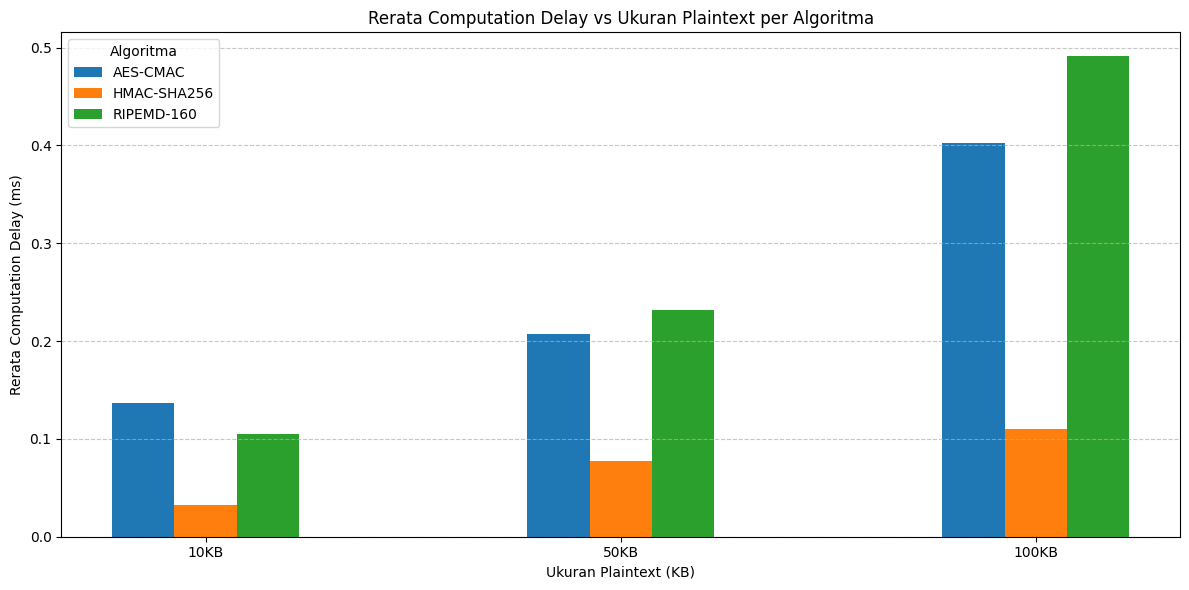

In [33]:
mean_delay = df.groupby(['Algorithm', 'Plaintext_Size_KB'])['Computation_Delay_ms'].mean().reset_index()
mean_delay['Plaintext_Size_KB'] = mean_delay['Plaintext_Size_KB'].str.replace('KB', '', regex=False).astype(int)
mean_delay = mean_delay.sort_values(['Plaintext_Size_KB', 'Algorithm'])
mean_delay['Plaintext_Size_Label'] = mean_delay['Plaintext_Size_KB'].astype(str) + 'KB'
algorithms = mean_delay['Algorithm'].unique()
plaintext_sizes = sorted(mean_delay['Plaintext_Size_KB'].unique())
bar_width = 0.15
x = np.arange(len(plaintext_sizes))
plt.figure(figsize=(12, 6))
for idx, algo in enumerate(algorithms):
    subset = mean_delay[mean_delay['Algorithm'] == algo]
    delays = subset['Computation_Delay_ms'].values
    pos = x + idx * bar_width
    plt.bar(pos, delays, width=bar_width, label=algo)
plt.xticks(x + bar_width * (len(algorithms) - 1) / 2, [f"{size}KB" for size in plaintext_sizes])
plt.xlabel('Ukuran Plaintext (KB)')
plt.ylabel('Rerata Computation Delay (ms)')
plt.title('Rerata Computation Delay vs Ukuran Plaintext per Algoritma')
plt.legend(title='Algoritma')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analisa Grafik Rerata Computation Delay vs Ukuran Plaintext per Algoritma:

* HMAC-SHA256 memiliki performa komputasi terbaik, terutama pada data kecil (10KB)
* AES-CMAC menunjukkan peningkatan delay komputasi yang signifikan seiring bertambahnya ukuran data
* RIPEMD-160 memiliki delay komputasi tertinggi, terutama pada data besar (100KB)

**Kesimpulan**: HMAC-SHA256 paling efisien dalam komputasi kriptografi.

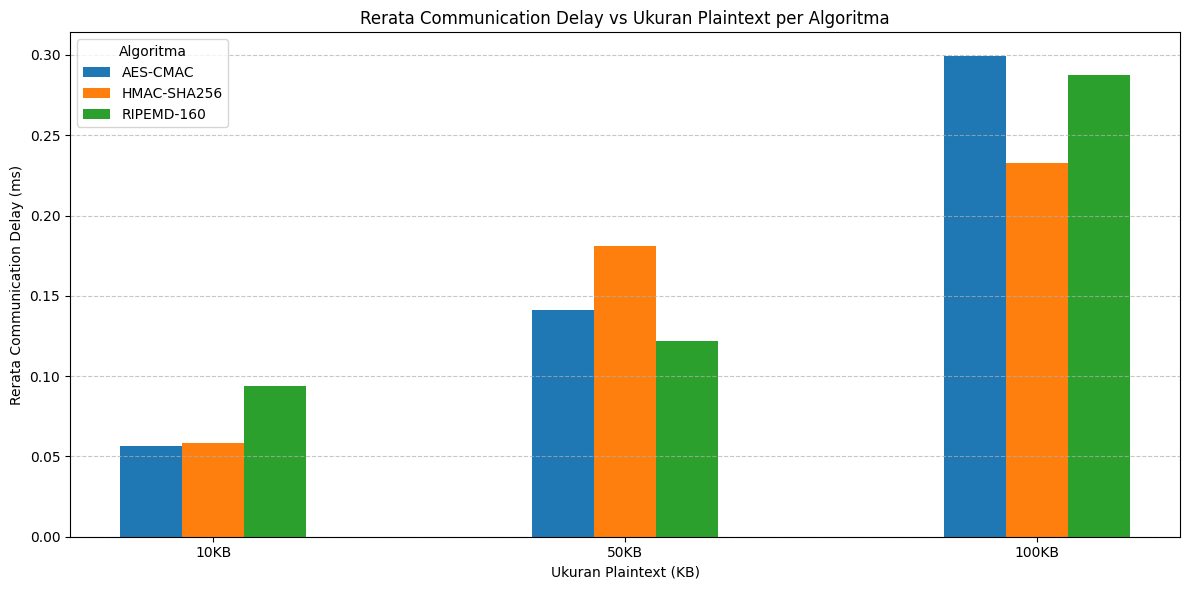

In [34]:
mean_delay2 = df.groupby(['Algorithm', 'Plaintext_Size_KB'])['Communication_Delay_ms'].mean().reset_index()
mean_delay2['Plaintext_Size_KB'] = mean_delay2['Plaintext_Size_KB'].str.replace('KB', '', regex=False).astype(int)
mean_delay2 = mean_delay2.sort_values(['Plaintext_Size_KB', 'Algorithm'])
mean_delay2['Plaintext_Size_Label'] = mean_delay2['Plaintext_Size_KB'].astype(str) + 'KB'
algorithms = mean_delay2['Algorithm'].unique()
plaintext_sizes = sorted(mean_delay2['Plaintext_Size_KB'].unique())
bar_width = 0.15
x = np.arange(len(plaintext_sizes))
plt.figure(figsize=(12, 6))
for idx, algo in enumerate(algorithms):
    subset = mean_delay2[mean_delay2['Algorithm'] == algo]
    delays = subset['Communication_Delay_ms'].values
    pos = x + idx * bar_width
    plt.bar(pos, delays, width=bar_width, label=algo)
plt.xticks(x + bar_width * (len(algorithms) - 1) / 2, [f"{size}KB" for size in plaintext_sizes])
plt.xlabel('Ukuran Plaintext (KB)')
plt.ylabel('Rerata Communication Delay (ms)')
plt.title('Rerata Communication Delay vs Ukuran Plaintext per Algoritma')
plt.legend(title='Algoritma')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Analisa Grafik Rerata Communication Delay vs Ukuran Plaintext per Algoritma:

* AES-CMAC memiliki performa komunikasi terbaik pada ukuran 10KB (kecil)
* HMAC-SHA256 memiliki performa komunikasi terbaik pada ukuran 100KB (besar)
* RIPEMD-160 memiliki performa komunikasi terbaik pada ukuran 50KB (sedang)

**Kesimpulan**: Ketiga algoritma memiliki kelebihan di masing-masing segmen ukuran data. Namun, HMAC-SHA256 menjadi algoritma yang paling stabil dimana tidak menunjukkan kenaikan delay yang signifikan di tiap segemen ukuran.

In [35]:
df1 = pd.read_csv('KKD/log_validasi_server.csv')
df1.head()

,Algorithm,Data Length (bytes),MAC Received,MAC Expected,Status,Comp Delay (ms),Timestamp
0,HMAC-SHA256,10240,28395bba6c913c3114da73bcea4bcc7863bc2ea0905e23...,28395bba6c913c3114da73bcea4bcc7863bc2ea0905e23...,VALID,0.866,2025-06-13T19:27:16.092
1,HMAC-SHA256,10240,020443f3398f859951799f8a46f2c7710aa06b2185887a...,020443f3398f859951799f8a46f2c7710aa06b2185887a...,VALID,0.038,2025-06-13T19:27:16.094
2,HMAC-SHA256,10240,249d66481ea086f736f6e2ac18f9cce88ae5aee01cde63...,249d66481ea086f736f6e2ac18f9cce88ae5aee01cde63...,VALID,0.032,2025-06-13T19:27:16.096
3,HMAC-SHA256,10240,95d61344b1bc15551ab4c7e0557e8ae1d510de8a5d3168...,95d61344b1bc15551ab4c7e0557e8ae1d510de8a5d3168...,VALID,0.030,2025-06-13T19:27:16.098
4,HMAC-SHA256,10240,d3bcb313de2f597c33652e7d910ec77584f32f23446541...,d3bcb313de2f597c33652e7d910ec77584f32f23446541...,VALID,0.023,2025-06-13T19:27:16.100


In [36]:
df1['Data_Length_(Kb)'] = (df1['Data Length (bytes)'] / 1024).astype(int).astype(str) + 'KB'
df1 = df1.drop(columns=['Data Length (bytes)'])
df1.head()

,Algorithm,MAC Received,MAC Expected,Status,Comp Delay (ms),Timestamp,Data_Length_(Kb)
0,HMAC-SHA256,28395bba6c913c3114da73bcea4bcc7863bc2ea0905e23...,28395bba6c913c3114da73bcea4bcc7863bc2ea0905e23...,VALID,0.866,2025-06-13T19:27:16.092,10KB
1,HMAC-SHA256,020443f3398f859951799f8a46f2c7710aa06b2185887a...,020443f3398f859951799f8a46f2c7710aa06b2185887a...,VALID,0.038,2025-06-13T19:27:16.094,10KB
2,HMAC-SHA256,249d66481ea086f736f6e2ac18f9cce88ae5aee01cde63...,249d66481ea086f736f6e2ac18f9cce88ae5aee01cde63...,VALID,0.032,2025-06-13T19:27:16.096,10KB
3,HMAC-SHA256,95d61344b1bc15551ab4c7e0557e8ae1d510de8a5d3168...,95d61344b1bc15551ab4c7e0557e8ae1d510de8a5d3168...,VALID,0.030,2025-06-13T19:27:16.098,10KB
4,HMAC-SHA256,d3bcb313de2f597c33652e7d910ec77584f32f23446541...,d3bcb313de2f597c33652e7d910ec77584f32f23446541...,VALID,0.023,2025-06-13T19:27:16.100,10KB


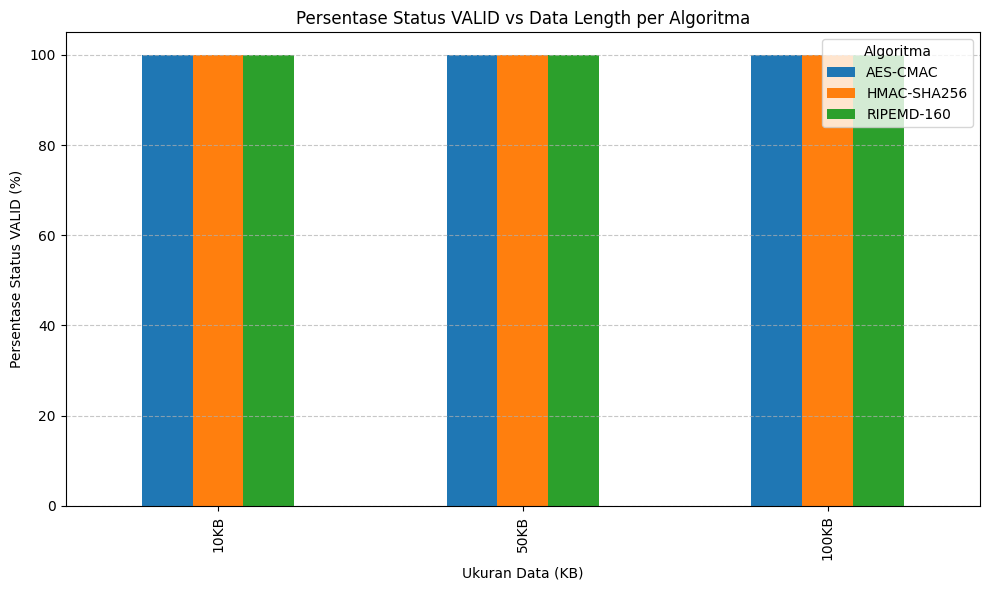

In [37]:
status_counts = df1.groupby(['Algorithm', 'Data_Length_(Kb)', 'Status']).size().unstack(fill_value=0)
status_percent = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

valid_percent = status_percent[['VALID']].reset_index()
valid_percent['Data_Length_(Kb)'] = valid_percent['Data_Length_(Kb)'].str.replace('KB', '', regex=False).astype(int)

pivot_valid = valid_percent.pivot(index='Data_Length_(Kb)', columns='Algorithm', values='VALID').sort_index()
pivot_valid.index = [f"{i}KB" for i in pivot_valid.index]

pivot_valid.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Persentase Status VALID (%)')
plt.xlabel('Ukuran Data (KB)')
plt.title('Persentase Status VALID vs Data Length per Algoritma')
plt.legend(title='Algoritma')
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Analisa Grafik Persentase Status VALID vs Data Length per Algoritma:

* Analisis reliabilitas dan akurasi autentikasi pada berbagai algoritma.
* Seluruh algoritma menunjukkan akurasi 100% pada ukuran data 10KB, 50KB, dan 100KB.

**Kesimpulan:** Semua algoritma terbukti sangat andal untuk data berukuran 10–100KB pada 100 sampel pengujian.

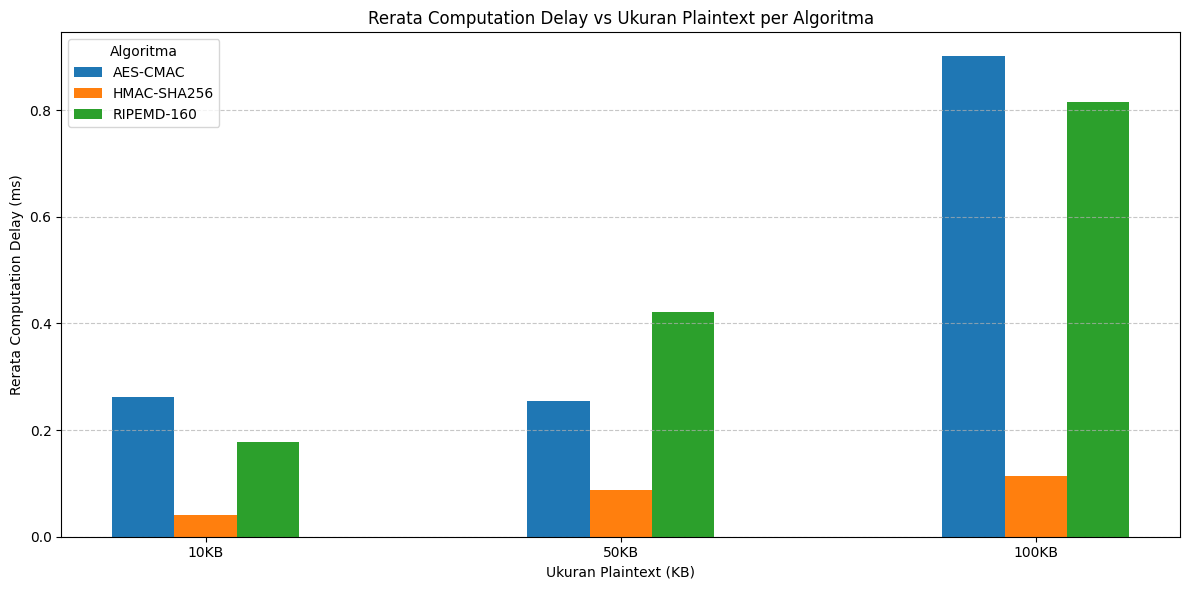

In [38]:
mean_delay3 = df1.groupby(['Algorithm', 'Data_Length_(Kb)'])['Comp Delay (ms)'].mean().reset_index()
mean_delay3['Data_Length_(Kb)'] = mean_delay3['Data_Length_(Kb)'].str.replace('KB', '', regex=False).astype(int)
mean_delay3 = mean_delay3.sort_values(['Data_Length_(Kb)', 'Algorithm'])
mean_delay3['Plaintext_Size_Label'] = mean_delay3['Data_Length_(Kb)'].astype(str) + 'KB'
algorithms = mean_delay3['Algorithm'].unique()
plaintext_sizes = sorted(mean_delay3['Data_Length_(Kb)'].unique())
bar_width = 0.15
x = np.arange(len(plaintext_sizes))
plt.figure(figsize=(12, 6))
for idx, algo in enumerate(algorithms):
    subset = mean_delay3[mean_delay3['Algorithm'] == algo]
    delays = subset['Comp Delay (ms)'].values
    pos = x + idx * bar_width
    plt.bar(pos, delays, width=bar_width, label=algo)
plt.xticks(x + bar_width * (len(algorithms) - 1) / 2, [f"{size}KB" for size in plaintext_sizes])
plt.xlabel('Ukuran Plaintext (KB)')
plt.ylabel('Rerata Computation Delay (ms)')
plt.title('Rerata Computation Delay vs Ukuran Plaintext per Algoritma')
plt.legend(title='Algoritma')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Analisa Grafik Rerata Computation Delay vs Ukuran Plaintext per Algoritma (Server):

* Konfirmasi computation delay dari sisi server
* Menunjukkan konsistensi bahwa HMAC-SHA256 memiliki overhead komputasi terendah
* AES-CMAC dan RIPEMD-160 menunjukkan peningkatan delay yang hampir linear dengan ukuran data